# Implementing Transfer Learning of CIFAR-10 Dataset

## Part 3: Training a Neural Network from Transfer Learning

### Importing Library

In [20]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_hub as hub

### Importing Dataset From Saved Files in Part 1

In [2]:
X = pickle.load(open("features.pickle", "rb"))
y = pickle.load(open("labels.pickle", "rb"))

In [3]:
X[0].shape

(224, 224, 3)

### Visualizing Dataset

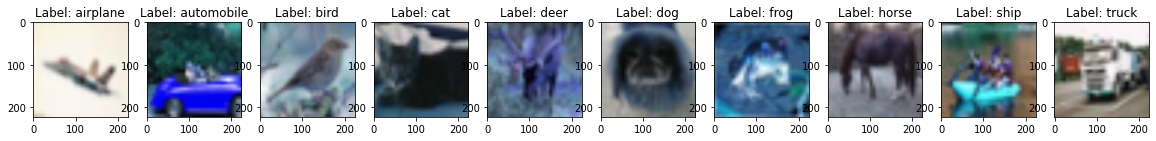

In [4]:
image_shape = (224, 224, 3)

labels = pd.read_csv("trainLabels.csv")
cifar_classes = sorted(list(set(labels.label.values)))

f, ax = plt.subplots(1, len(cifar_classes), figsize=(20, 20))

for each_class in cifar_classes:
    index = cifar_classes.index(each_class)
    image = X[y == index][0]
    ax[index].imshow(image)
    ax[index].set_title("Label: {}".format(each_class));

plt.show()

### Splitting Training and Testing Set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Normalizing Dataset

In [6]:
x_train = x_train/255.0

### Feature Extractor (MobileNet v2)

In [10]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

model = Sequential([
    hub.KerasLayer(feature_extractor_model, input_shape=image_shape, trainable=False),
    Dense(len(cifar_classes), activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


### Training The Model

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
110/110 [==============================] - 52s 452ms/step - loss: 0.9181 - accuracy: 0.6886
Epoch 2/5
110/110 [==============================] - 49s 446ms/step - loss: 0.6481 - accuracy: 0.7834
Epoch 3/5
110/110 [==============================] - 48s 437ms/step - loss: 0.5513 - accuracy: 0.8097
Epoch 4/5
110/110 [==============================] - 48s 435ms/step - loss: 0.4775 - accuracy: 0.8446
Epoch 5/5
110/110 [==============================] - 48s 438ms/step - loss: 0.4257 - accuracy: 0.8637


### Testing Data

In [15]:
x_test = x_test/255.0

In [17]:
y_predict = model.predict(x_test[:10])

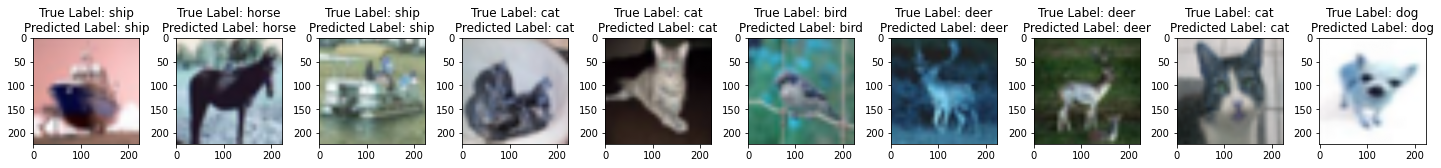

In [29]:
f, ax = plt.subplots(1, len(y_predict), figsize=(20, 20))
index=0

for prediction in y_predict:
    predict_value = cifar_classes[np.argmax(prediction)]
    true_value = cifar_classes[y_test[index]]
    ax[index].imshow(x_test[index])
    ax[index].set_title("True Label: {}\nPredicted Label: {}".format(true_value, predict_value));
    index+=1

f.tight_layout()
plt.show()

### Conclusion

In the end, we can see that just with 5 epochs and 3500 Training Data, we can achieve accuracy of 86% when using MobileNet v2. It is both fast, accurate and resource saving than training our network from the scratch. 